### Importaciones
Neserarias para el funcionamiento el código

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, Function, dsolve, exp, sin, pi, tan, sympify

### Definicion de la funcion

In [90]:
def funcion_f(ecuacion:str="x"):
    function = sp.sympify(ecuacion)
    return function

# Se define la familia de funciones
def FamiliaSoluciones(C:1):
    # Se define cual va a hacer la variable independiente (t)
    t = sp.symbols('t')
    solucionGeneral = 2 * sp.atan(C * sp.exp(sp.exp(t)))
    return solucionGeneral

In [91]:
# Estas constantes de integración (C) se obtinen al despejar la famlia de soluciones con el valor inicial
C_1 = ((np.tan(3/20)) / (sp.exp(sp.exp(3/10))))
C_2 = ((np.tan(301/2000)) / (sp.exp(sp.exp(301/1000))))
C_3 = ((np.tan(151/1000)) / (sp.exp(sp.exp(151/500))))

In [92]:
#c = -3.15
# Definir la solución simbólica
solucionSimbolica_1 = FamiliaSoluciones(C_1)
solucionSimbolica_2 = FamiliaSoluciones(C_2)
solucionSimbolica_3 = FamiliaSoluciones(C_3)
#funcion_simbolica4 = 2 * sp.atan(0 * sp.exp(sp.exp(t)))
#funcion_simbolica5 = 2 * sp.atan((c+1) * sp.exp(sp.exp(t)))
#funcion_simbolica6 = 2 * sp.atan((c+2) * sp.exp(sp.exp(t)))
#funcion_simbolica7 = 2 * sp.atan((c+3) * sp.exp(sp.exp(t)))
#funcion_simbolica8 = 2 * sp.atan((c+4) * sp.exp(sp.exp(t)))
#funcion_simbolica9 = 2 * sp.atan((c+5) * sp.exp(sp.exp(t)))
#funcion_simbolica10 = 2 * sp.atan((c+6) * sp.exp(sp.exp(t)))


### Condiciones del método

In [93]:
# Dijita el número de iteraciones:
numeroIteraciones = 8
# Dijita el valor inicial en el eje t:
pasoInicial_t = -4
# Dijita el valor final en el eje t:
pasoFinal_t = 4

*Calculo del $\Delta t$*

In [94]:
delta_t = (pasoFinal_t - pasoInicial_t) / numeroIteraciones
delta_t

1.0

### Soluciones exactas

In [95]:
# Creamos una lista con un solo elemento de nuestro valor inicial de t
vectorSolucion_t = np.array([pasoInicial_t])

# Iteramos para poblar el vector con las soluciones exactas para graficar la función exacta
for _ in range(numeroIteraciones * 100): # Multiplicamos por 100 para mejorar la precisión
    t_i = vectorSolucion_t[-1] + delta_t / 100 # Usamos el último elemento del vector
    vectorSolucion_t = np.append(vectorSolucion_t, t_i)

In [96]:
# Evaluamos la función en cada paso y almacenamos el resultado en la corespondiente lista vectorSolucion_x
vectorSolucion_x_1 = [solucionSimbolica_1.subs({t: valor}) for valor in list(vectorSolucion_t)]
vectorSolucion_x_2 = [solucionSimbolica_2.subs({t: valor}) for valor in list(vectorSolucion_t)]
vectorSolucion_x_3 = [solucionSimbolica_3.subs({t: valor}) for valor in list(vectorSolucion_t)]

In [ ]:
# Definimos las soluciones simbólicas en una lista para poder iterar sobre ellas
soluciones_simbolicas = [solucionSimbolica_1, solucionSimbolica_2, solucionSimbolica_3]

# Evaluamos la función en cada paso y almacenamos el resultado en la correspondiente lista vectorSolucion_x
vectorSolucion_x = [[sol.subs({t: valor}) for valor in vectorSolucion_t] for sol in soluciones_simbolicas]

### Grafica trajando

In [97]:
#colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#colores_intensos = ['#FF355E', '#FD5B78', '#FF6037', '#FF9966', '#FF9933', '#FFCC33', '#FFFF66', '#CCFF00', '#66FF66', '#AAF0D1']
#colores_intensos = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


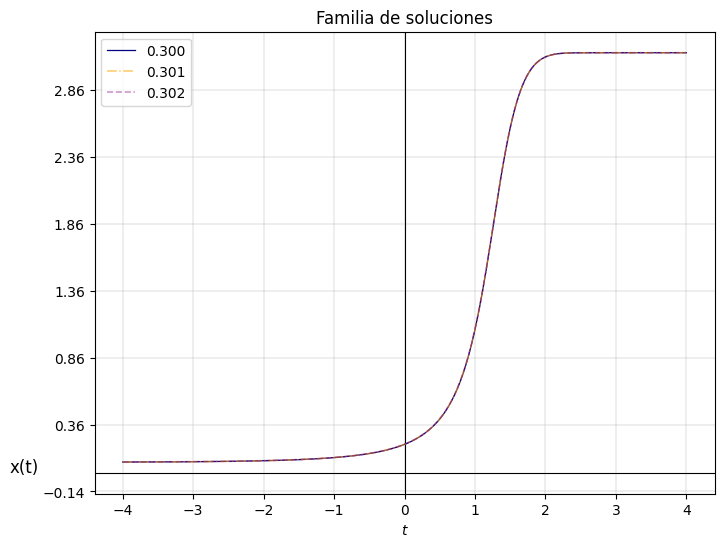

In [98]:
plt.figure(figsize=(8, 6))
plt.text(-5.6, 0, 'x(t)', rotation='horizontal', fontsize=12)  # Colocar 'x(t)' verticalmente
plt.xticks(np.arange(-4, 5, 1))  # Marcas cada unidad en el eje x
plt.yticks(np.arange(-3.14, 4.14, 0.5))  # Marcas cada unidad en el eje y
plt.grid(True, linewidth=0.3)  # Ajusta el ancho de las líneas de la cuadrícula
plt.axhline(0, color='black', linewidth=0.8)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.8)  # Línea vertical en x=0
plt.xlabel('$t$')
plt.plot(
    vectorSolucion_t,
    vectorSolucion_x_1,
    label="0.300",
    color='navy',
    linestyle='-',
    linewidth=0.9,
    markersize=12, 
)
plt.plot(
    vectorSolucion_t,
    vectorSolucion_x_2,
    label="0.301",
    color='orange',
    linestyle='-.',
    alpha = 0.6,
    linewidth=1.1,
    markersize=12, 
)
plt.plot(
    vectorSolucion_t,
    vectorSolucion_x_3,
    label="0.302",
    color="purple",
    linestyle='--',
    alpha = 0.4,
    linewidth=1.2,
    markersize=12, 
)

plt.legend()  # Esto coloca la leyenda en la esquina superior izquierda
plt.title("Familia de soluciones")
plt.savefig("Familia de soluciones.pdf")  # Con esta se guarda la imagen en formato pdf
plt.show()